In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd 

Downloads of dataset

In [ ]:
pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown 1o5MUso55NfTymcO_KsWAaLLd7py4yU6Q

Downloading...
From: https://drive.google.com/uc?id=1o5MUso55NfTymcO_KsWAaLLd7py4yU6Q
To: /content/TwitterDataset.zip
100% 2.10M/2.10M [00:00<00:00, 211MB/s]


In [ ]:
!unzip /content/TwitterDataset.zip

Archive:  /content/TwitterDataset.zip
  inflating: HW2/twitter_test.csv    
  inflating: HW2/twitter_training.csv  


Preprocessing of the Training and the Test Set

In [ ]:
columns = ["Id","Entity","Target","Text"]
data_train = pd.read_csv("/content/HW2/twitter_training.csv",
                   names=columns,header=None)

In [ ]:
columns = ["Id","Entity","Target","Text"]
data_test = pd.read_csv("/content/HW2/twitter_test.csv",
                   names=columns,header=None)

In [ ]:
data_train.head(50)

,Id,Entity,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [ ]:
#We take only the column "Text" and "Target"
df_train = data_train[["Text","Target"]]

In [ ]:
df_train.head()

,Text,Target
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [ ]:
df_train.shape

(74682, 2)

In [ ]:
df_test = data_test[["Text","Target"]]

In [ ]:
df_test.head()

,Text,Target
0,I mentioned on Facebook that I was struggling ...,Irrelevant
1,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral
2,@Microsoft Why do I pay for WORD when it funct...,Negative
3,"CSGO matchmaking is so full of closet hacking,...",Negative
4,Now the President is slapping Americans in the...,Neutral


In [ ]:
df_test.shape

(1000, 2)

In [ ]:
df_toappend = df_train.sample(n = 6000, random_state=1)
df_toappend

,Text,Target
85,FICK YESSSSSS.,Positive
36834,Why are people talking about microsoft buying ...,Negative
74567,Nvidia's ready to announce the bad stuff.. Rea...,Neutral
64449,Gee. I didn't realize Madden NFL needed QBs fo...,Negative
28917,The game is an absolute shredder!!!,Positive
...,...,...
68436,Nice!,Positive
28536,@PlayApex FIX YOUR SERVERS WHAT THE HELL,Negative
72330,@Ubisoft @GhostRecon your update that was supp...,Negative
68435,I can’t wait for this book come out,Positive


In [ ]:
df_toappend.index

Int64Index([   85, 36834, 74567, 64449, 28917, 43164, 29359, 66633, 65391,
            62134,
            ...
            10870, 10064, 14434, 14852, 49728, 68436, 28536, 72330, 68435,
            19705],
           dtype='int64', length=6000)

In [ ]:
for r in df_train.index:
    for i in df_toappend.index:
        if r==i:
            df_train = df_train.drop(index=[r])

In [ ]:
df_train

,Text,Target
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive
...,...,...
74677,Just realized that the Windows partition of my...,Positive
74678,Just realized that my Mac window partition is ...,Positive
74679,Just realized the windows partition of my Mac ...,Positive
74680,Just realized between the windows partition of...,Positive


In [ ]:
df_test = df_test.append(df_toappend)
df_test

,Text,Target
0,I mentioned on Facebook that I was struggling ...,Irrelevant
1,BBC News - Amazon boss Jeff Bezos rejects clai...,Neutral
2,@Microsoft Why do I pay for WORD when it funct...,Negative
3,"CSGO matchmaking is so full of closet hacking,...",Negative
4,Now the President is slapping Americans in the...,Neutral
...,...,...
68436,Nice!,Positive
28536,@PlayApex FIX YOUR SERVERS WHAT THE HELL,Negative
72330,@Ubisoft @GhostRecon your update that was supp...,Negative
68435,I can’t wait for this book come out,Positive


In [ ]:
len(df_test)

7000

In [ ]:
for df in ["df_train", "df_test"]:
  if df == "df_train":
    df_train  = df_train.convert_dtypes()
    df_train  = df_train.dropna()
    print("The type of df_train: \n ", df_train.dtypes)
  else:
    df_test  = df_test.convert_dtypes()
    df_test  = df_test.dropna()
    print("\nThe type of df_test: \n ", df_test.dtypes)

The type of df_train: 
  Text      string
Target    string
dtype: object

The type of df_test: 
  Text      string
Target    string
dtype: object


Processing the tweets

In [ ]:
# Remove punctuaction
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 37.3 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=727dbd1ed4bb95be8f60aa78505a7d2d0e7ae6f9acee1281ea5dc80eff7053f4
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
for df in ["df_train", "df_test"]:
  if df == "df_train":
    tweets_train = df_train["Text"]
  else:
    tweets_test = df_test["Text"]


In [ ]:
for df in ["df_train", "df_test"]:
  if df == "df_train":
    tweets_train = df_train["Text"]
  else:
    tweets_test = df_test["Text"]

In [ ]:
for df in ["tweets_train", "tweets_test"]:
  if df == "tweets_train":
    list_characters = [[c for c in t if c not in punctuation] for t in tweets_train]
    tweets_train = ["".join(t).lower() for t in list_characters]
    tweets_train = [clean(t, no_emoji=True) for t in tweets_train]
    print("The tweets for the train are: ", tweets_train[:50])
    print("The lenght of tweets_train is: ",len(tweets_train))
  else:
    tweets_test = df_test["Text"]
    list_characters = [[c for c in t if c not in punctuation] for t in tweets_test]
    tweets_test = ["".join(t).lower() for t in list_characters]
    tweets_test = [clean(t, no_emoji=True) for t in tweets_test]
    print("\nThe tweets for the test are: ", tweets_test[:50])
    print("The lenght of tweets_test is: ",len(tweets_test))

The tweets for the train are:  ['im getting on borderlands and i will murder you all', 'i am coming to the borders and i will kill you all', 'im getting on borderlands and i will kill you all', 'im coming on borderlands and i will murder you all', 'im getting on borderlands 2 and i will murder you me all', 'im getting into borderlands and i can murder you all', 'so i spent a few hours making something for fun if you dont know i am a huge borderlands fan and maya is one of my favorite characters so i decided to make myself a wallpaper for my pc here is the original image versus the creation i made enjoy pictwittercommlsi5wf9jg', 'so i spent a couple of hours doing something for fun if you dont know that im a huge borderlands fan and maya is one of my favorite characters i decided to make a wallpaper for my pc heres the original picture compared to the creation i made have fun pictwittercom mlsi5wf9jg', 'so i spent a few hours doing something for fun if you dont know im a huge borderland

In [ ]:
for df in ["tweets_train", "tweets_test"]:
  if df == "tweets_train":
    tweets_train = [[w for w in t.replace("\n", " ").split(" ") if len(w)>0] for t in tweets_train]
    print("Tweet_train: ", tweets_train[0])
  else:
    tweets_test = [[w for w in r.replace("\n", " ").split(" ") if len(w)>0] for r in tweets_test]
    print("Tweet_test: ", tweets_test[0])

Tweet_train:  ['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'murder', 'you', 'all']
Tweet_test:  ['i', 'mentioned', 'on', 'facebook', 'that', 'i', 'was', 'struggling', 'for', 'motivation', 'to', 'go', 'for', 'a', 'run', 'the', 'other', 'day', 'which', 'has', 'been', 'translated', 'by', "tom's", 'great', 'auntie', 'as', "'hayley", "can't", 'get', 'out', 'of', "bed'", 'and', 'told', 'to', 'his', 'grandma', 'who', 'now', 'thinks', "i'm", 'a', 'lazy', 'terrible', 'person']


In [ ]:
  # compute the length of each tweets in tweets_train
tweets_lens_train = [len(r) for r in tweets_train]
# print the lenght of the first x tweets
tweets_lens_train[:10]

[10, 12, 10, 10, 12, 10, 51, 52, 27, 51]

In [ ]:
# print the average tweets lenght
sum(tweets_lens_train) / len(tweets_lens_train)

18.40751245462695

In [ ]:
#Creation of a unique list of words
final_tweets = tweets_train + tweets_test

In [ ]:
len(final_tweets)

74996

In [ ]:
final_tweets[50]

['why',
 'does',
 'like',
 'every',
 'man',
 'in',
 'borderlands',
 'have',
 'slicked',
 'back',
 'hair',
 "haven't",
 'you',
 'heard',
 'of',
 'bangs',
 'you',
 'stupid',
 'assholes']

In [ ]:
# build vocabulary
words = list(set([w for r in final_tweets for w in r]))
vocab = {words[i]: i+1 for i in range(len(words))} # we reserve i=0 for pad sequences

In [ ]:
len(vocab)

41841

In [ ]:
# Convert tweets to word indexes
for df in ["tweets_train", "tweets_test"]:
  if df == "tweets_train":
    tweets_train = [[vocab[w] for w in r] for r in tweets_train]
    print(tweets_train[0])
  else:
    tweets_test = [[vocab[w] for w in r] for r in tweets_test]
    print(tweets_test[0])

[6236, 28594, 1895, 1799, 10046, 41453, 5532, 17567, 30634, 4109]
[41453, 37865, 1895, 25909, 10406, 41453, 31266, 5985, 28537, 36059, 6889, 16213, 28537, 2033, 24641, 14570, 10879, 20609, 16147, 6346, 31172, 33637, 7844, 19720, 1724, 29644, 38416, 3179, 13934, 313, 22973, 23732, 30001, 10046, 5735, 6889, 14201, 6719, 38644, 32766, 18310, 32709, 2033, 19665, 40117, 3244]


In [ ]:
#For example, we can print the word corrispondent to the first element of tweets_train
words[tweets_train[0][0]-1]

'im'

The reviews have different lengths, while, we want that all reviews have the same length

In [ ]:
seq_len = 15    # number of words for each sentence

In [ ]:
for df in ["tweets_train", "tweets_test"]:
  if df == "tweets_train":
    # Clip tweets to max seq_len words
    tweets_train = [r[:seq_len] for r in tweets_train]
    
    # Print average tweets length now
    tweets_lens_train = [len(r) for r in tweets_train]
    print("Tweets of the train length before padding: ", sum(tweets_lens_train)/len(tweets_lens_train))
    
    # Pad tweets shorter than seq_len
    # TODO test padding at the end
    tweets_train = [[0]*(seq_len - len(r)) + r for r in tweets_train]
    
    # Print average tweet length now
    tweets_lens_train = [len(r) for r in tweets_train]
    print("Tweets of the train length after padding: ", sum(tweets_lens_train)/len(tweets_lens_train))
  else:
    tweets_test = [r[:seq_len] for r in tweets_test]
    
    # Print average tweet length now
    tweets_lens_test = [len(r) for r in tweets_test]
    print("Tweets of the test length before padding: ", sum(tweets_lens_test)/len(tweets_lens_test))
    
    # Pad tweets shorter than seq_len
    # TODO test padding at the end
    tweets_test = [[0]*(seq_len - len(r)) + r for r in tweets_test]
    
    # Print average tweet length now
    tweets_lens_test = [len(r) for r in tweets_test]
    print("Tweets of the test length after padding: ",sum(tweets_lens_test)/len(tweets_lens_test))

Tweets of the train length before padding:  11.354975237703352
Tweets of the train length after padding:  15.0
Tweets of the test length before padding:  11.53633616347676
Tweets of the test length after padding:  15.0


Now, we can convert tweets_train and tweets_test in a Tensor:

In [ ]:
for df in ["tweets_train", "tweets_test"]:
  if df == "tweets_train":
    # Convert tweets to tensor
    train = torch.LongTensor(tweets_train)
    print("The size of the train is: ", train.size())
  else:
    test_data = torch.LongTensor(tweets_test)
    print("The size of the train is: ", test_data.size())
    

The size of the train is:  torch.Size([68047, 15])
The size of the train is:  torch.Size([6949, 15])


Processing the labels

In [ ]:
label_train = df_train["Target"]

In [ ]:
len(label_train)

68047

In [ ]:
label_test = df_test["Target"]

In [ ]:
len(label_test)

6949

[Text(0.5, 1.0, 'Labels for Train')]

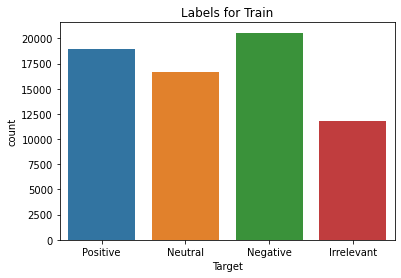

In [ ]:
import seaborn as sns
sns.countplot(x="Target",data=df_train).set(title='Labels for Train')

[Text(0.5, 1.0, 'Labels for Test')]

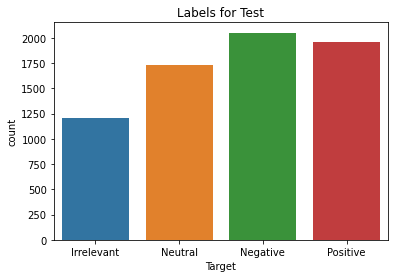

In [ ]:
label_test = df_test["Target"]
sns.countplot(x="Target",data=df_test).set(title='Labels for Test')

In [ ]:
for labels in ["label_train", "label_test"]:
  if labels == "label_train":
    sentiments_train = []
    for i in label_train:
      if i == "Positive":
        sentiments_train.append(2)
      elif (i == "Irrelevant") or (i == "Neutral"):
        sentiments_train.append(1)
      else:
        sentiments_train.append(0)
    df_train["Sentiments"] = sentiments_train
  else:
    sentiments_test = []
    for i in label_test:
      if i == "Positive":
        sentiments_test.append(2)
      elif (i == "Irrelevant") or (i == "Neutral"):
        sentiments_test.append(1)
      else:
        sentiments_test.append(0)
    df_test["Sentiments"] = sentiments_test

In [ ]:
df_train.head()

,Text,Target,Sentiments
0,im getting on borderlands and i will murder yo...,Positive,2
1,I am coming to the borders and I will kill you...,Positive,2
2,im getting on borderlands and i will kill you ...,Positive,2
3,im coming on borderlands and i will murder you...,Positive,2
4,im getting on borderlands 2 and i will murder ...,Positive,2


[Text(0.5, 1.0, 'Numeric labels for Train')]

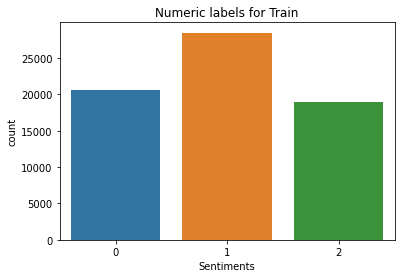

In [ ]:
sns.countplot(x="Sentiments",data=df_train).set(title='Numeric labels for Train')

[Text(0.5, 1.0, 'Numeric labels for Test')]

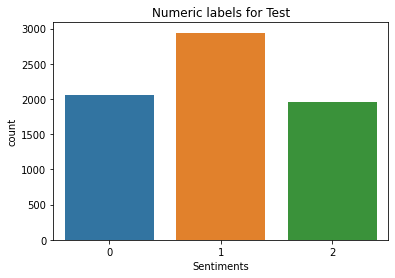

In [ ]:
sns.countplot(x="Sentiments",data=df_test).set(title='Numeric labels for Test')

In [ ]:
# Convert sentiments to tensor for train
labels_train = torch.LongTensor(sentiments_train)
print("The size of the labels_train is: ", labels_train.size())

The size of the labels_train is:  torch.Size([68047])


In [ ]:
# Convert sentiments to tensor for train
test_labels = torch.LongTensor(sentiments_test)
print("The size of the labels_test is: ", test_labels.size())

The size of the labels_test is:  torch.Size([6949])


Defining the Datasets

In [ ]:
num_train = len(tweets_train)
num_test = len(tweets_test)
print(f"Num. training samples: {num_train}")
print(f"Num. test samples:     {num_test}")

Num. training samples: 68047
Num. test samples:     6949


In [ ]:
#Validation set
val_frac= 0.1 

In [ ]:
# shuffle dataset
num_data = train.size(0)
shuffle_idx = torch.randperm(num_data)
train = train[shuffle_idx,:]
labels_train = labels_train[shuffle_idx]

In [ ]:
# split training, validation and test
num_val = int(num_data*val_frac)
num_train = num_data - num_val
train_data = train[:num_train,:]
train_labels = labels_train[:num_train]
val_data = train[num_train:num_train+num_val,:]
val_labels = labels_train[num_train:num_train+num_val]

In [ ]:
print(train_data.size())
print(val_data.size())
print(test_data.size())

torch.Size([61243, 15])
torch.Size([6804, 15])
torch.Size([6949, 15])


In [ ]:
train_data = torch.LongTensor(train_data)
val_data = torch.LongTensor(val_data)
test_data = torch.LongTensor(test_data)

train_labels = torch.LongTensor(train_labels)
val_labels = torch.LongTensor(val_labels)
test_labels = torch.LongTensor(test_labels)

In [ ]:
print(train_data.size())
print(val_data.size())
print(test_data.size())

torch.Size([61243, 15])
torch.Size([6804, 15])
torch.Size([6949, 15])


In [ ]:
print(train_labels.size())
print(val_labels.size())
print(test_labels.size())

torch.Size([61243])
torch.Size([6804])
torch.Size([6949])


In [ ]:
# create datasets
train_dataset = TensorDataset(train_data, train_labels)
val_dataset = TensorDataset(val_data, val_labels)
test_dataset = TensorDataset(test_data, test_labels)

In [ ]:
#Define the batch size
batch_size = 256

In [ ]:
# print the first elem of train dataset and its label
print(train_dataset[0])

(tensor([41335, 41335, 12123, 13487,  5532, 14530, 39790, 33558,  6097, 30090,
        13839, 27342, 17163,  6345, 14782]), tensor(1))


In [ ]:
# Create loaders
loaders = {"train": DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  drop_last=True),
           "val":   DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, drop_last=False),
           "test":  DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, drop_last=False)}

## Defining our RNN

In [ ]:
# Define model
#class Model(nn.Module):
#    
#    def __init__(self, num_embed, embed_size, rnn_size):
#        # params: 
#        # num_embed: the number of the input vocabulary
#        # embed_size: the size of the feature embedding
#       # rnn_size: the number of neurons in the recurrent layer
#
#        # Call parent constructor
#        super().__init__()
#        # Store values
#        self.rnn_size = rnn_size
 #       # Define modules
#        self.embedding = nn.Embedding(len(vocab_train)+1, embed_size)
#        self.rnn = nn.RNNCell(embed_size, rnn_size) #RNNCell represents only a single time step
#        self.output = nn.Linear(rnn_size, 3)
#        self.softmax = nn.Softmax(dim=1)
#        
#    def forward(self, x):
#        # Embed data
#        x = self.embedding(x)
#        # Initialize state
#        h = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the state of the cell
#        
#        # Input is: B x T x F
#       # Process each time step
#        for t in range(x.shape[1]):
#            # Input at time t
#            x_t = x[:,t,:]
#            # Forward RNN and get new state
#            h = self.rnn(x_t, h)
#        # Classify final state
#        x = self.output(h)
#        x = self.softmax(x)
#        return x

In [ ]:
# Define model
class Model(nn.Module):
    
    def __init__(self, num_embed, embed_size, rnn_size):
        # params: 
        # num_embed: the number of the input vocabulary
        # embed_size: the size of the feature embedding
        # rnn_size: the number of neurons in the recurrent layer

        # Call parent constructor
        super().__init__()
        # Store values
        self.rnn_size = rnn_size
        # Define modules
        self.embedding = nn.Embedding(num_embed, embed_size)
        self.LSTM = nn.LSTMCell(embed_size, rnn_size) #LSTMCell receaves only a single time step
        
        self.output = nn.Linear(rnn_size, 3)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Embed data
        x = self.embedding(x)
        # Initialize state
        c = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the state of the cell
        h = torch.zeros(x.shape[0], self.rnn_size).to(x.device.type) # the output of the cell
        
        # Input is: B x T x F
        # Process each time step
        for t in range(x.shape[1]):
            # Input at time t
            x_t = x[:,t,:]
            # Forward RNN and get new state
            h,c = self.LSTM(x_t, (h, c))  # the LSTMCell wants the input(x_t) and the previous state (h and c)
        
        # at the end of the loop, h is the final output of the LSTMCell after processing all the sequence

        # Classify final state        
        out= self.output(h)
        x = self.softmax(out)
        return x

In [ ]:
# Setup device
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#dev = "cpu"

In [ ]:
# Model parameters
embed_size = 1024
rnn_size = 512

In [ ]:
# Create model
model = Model((len(vocab)+1), embed_size, rnn_size).to(dev)

In [ ]:
# Test model output
model.eval()
test_input = train_dataset[0][0].unsqueeze(0).to(dev)
print("Test input size: ", test_input.size())
print("Model output size:", model(test_input).size())

Test input size:  torch.Size([1, 15])
Model output size: torch.Size([1, 3])


In [ ]:
# Create optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

# Define a loss 
criterion = nn.CrossEntropyLoss()

In [ ]:
# Start training
from tqdm import tqdm
for epoch in range(100):
    # Initialize accumulators for computing average loss/accuracy
    epoch_loss_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_loss_cnt = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_sum = {'train': 0, 'val': 0, 'test': 0}
    epoch_accuracy_cnt = {'train': 0, 'val': 0, 'test': 0}
    # Process each split
    for split in ["train", "val", "test"]:
        # Set network mode
        if split == "train":
            model.train()
            torch.set_grad_enabled(True)
        else:
            model.eval()
            torch.set_grad_enabled(False)
        # Process all data in split
        for input, target in tqdm(loaders[split]):
            # Move to device
            input = input.to(dev)
            target = target.to(dev)
            # Reset gradients
            optimizer.zero_grad()
            # Forward
            output = model(input)
            loss = criterion(output, target)
            # Update loss sum
            epoch_loss_sum[split] += loss.item()
            epoch_loss_cnt[split] += 1
            # Compute accuracy
            _,pred = output.max(1)
            correct = pred.eq(target).sum().item()
            accuracy = correct/input.size(0)
            # Update accuracy sum
            epoch_accuracy_sum[split] += accuracy
            epoch_accuracy_cnt[split] += 1
            # Backward and optimize
            if split == "train":
                loss.backward()
                optimizer.step()
    # Compute average epoch loss/accuracy
    avg_train_loss = epoch_loss_sum["train"]/epoch_loss_cnt["train"]
    avg_train_accuracy = epoch_accuracy_sum["train"]/epoch_accuracy_cnt["train"]
    avg_val_loss = epoch_loss_sum["val"]/epoch_loss_cnt["val"]
    avg_val_accuracy = epoch_accuracy_sum["val"]/epoch_accuracy_cnt["val"]
    avg_test_loss = epoch_loss_sum["test"]/epoch_loss_cnt["test"]
    avg_test_accuracy = epoch_accuracy_sum["test"]/epoch_accuracy_cnt["test"]
    print(f"Epoch: {epoch+1}, TrL={avg_train_loss:.4f}, TrA={avg_train_accuracy:.4f},",
                            f"VL={avg_val_loss:.4f}, VA={avg_val_accuracy:.4f}, ",
                            f"TeL={avg_test_loss:.4f}, TeA={avg_test_accuracy:.4f}")

100%|██████████| 28/28 [00:00<00:00, 109.54it/s]


Epoch: 1, TrL=0.9517, TrA=0.5821, VL=0.9210, VA=0.6161,  TeL=0.9098, TeA=0.6310


100%|██████████| 28/28 [00:00<00:00, 107.62it/s]


Epoch: 2, TrL=0.8756, TrA=0.6668, VL=0.8771, VA=0.6668,  TeL=0.8728, TeA=0.6713


100%|██████████| 28/28 [00:00<00:00, 104.52it/s]


Epoch: 3, TrL=0.8384, TrA=0.7075, VL=0.8658, VA=0.6735,  TeL=0.8578, TeA=0.6873


100%|██████████| 28/28 [00:00<00:00, 105.85it/s]


Epoch: 4, TrL=0.8113, TrA=0.7365, VL=0.8430, VA=0.7059,  TeL=0.8338, TeA=0.7134


100%|██████████| 28/28 [00:00<00:00, 102.21it/s]


Epoch: 5, TrL=0.7906, TrA=0.7599, VL=0.8305, VA=0.7159,  TeL=0.8270, TeA=0.7199


100%|██████████| 28/28 [00:00<00:00, 103.85it/s]


Epoch: 6, TrL=0.7792, TrA=0.7723, VL=0.8258, VA=0.7197,  TeL=0.8167, TeA=0.7315


100%|██████████| 28/28 [00:00<00:00, 75.34it/s]


Epoch: 7, TrL=0.7718, TrA=0.7804, VL=0.8199, VA=0.7276,  TeL=0.8115, TeA=0.7349


100%|██████████| 28/28 [00:00<00:00, 102.06it/s]


Epoch: 8, TrL=0.7687, TrA=0.7835, VL=0.8164, VA=0.7294,  TeL=0.8074, TeA=0.7403


100%|██████████| 28/28 [00:00<00:00, 100.54it/s]


Epoch: 9, TrL=0.7683, TrA=0.7839, VL=0.8172, VA=0.7317,  TeL=0.8044, TeA=0.7437


100%|██████████| 28/28 [00:00<00:00, 99.24it/s]


Epoch: 10, TrL=0.7643, TrA=0.7878, VL=0.8082, VA=0.7383,  TeL=0.7995, TeA=0.7506


100%|██████████| 28/28 [00:00<00:00, 102.50it/s]


Epoch: 11, TrL=0.7653, TrA=0.7868, VL=0.8011, VA=0.7479,  TeL=0.7965, TeA=0.7509


100%|██████████| 28/28 [00:00<00:00, 100.10it/s]


Epoch: 12, TrL=0.7649, TrA=0.7867, VL=0.8086, VA=0.7358,  TeL=0.8020, TeA=0.7463


100%|██████████| 28/28 [00:00<00:00, 103.44it/s]


Epoch: 13, TrL=0.7635, TrA=0.7890, VL=0.7978, VA=0.7493,  TeL=0.7960, TeA=0.7515


100%|██████████| 28/28 [00:00<00:00, 100.84it/s]


Epoch: 14, TrL=0.7654, TrA=0.7862, VL=0.7943, VA=0.7526,  TeL=0.7913, TeA=0.7565


100%|██████████| 28/28 [00:00<00:00, 100.19it/s]


Epoch: 15, TrL=0.7630, TrA=0.7882, VL=0.7974, VA=0.7493,  TeL=0.7901, TeA=0.7604


100%|██████████| 28/28 [00:00<00:00, 103.28it/s]


Epoch: 16, TrL=0.7593, TrA=0.7919, VL=0.7848, VA=0.7658,  TeL=0.7830, TeA=0.7686


100%|██████████| 28/28 [00:00<00:00, 100.34it/s]


Epoch: 17, TrL=0.7561, TrA=0.7958, VL=0.8001, VA=0.7494,  TeL=0.7914, TeA=0.7561


100%|██████████| 28/28 [00:00<00:00, 99.46it/s]


Epoch: 18, TrL=0.7551, TrA=0.7963, VL=0.7743, VA=0.7770,  TeL=0.7711, TeA=0.7781


100%|██████████| 28/28 [00:00<00:00, 100.55it/s]


Epoch: 19, TrL=0.7458, TrA=0.8057, VL=0.7714, VA=0.7793,  TeL=0.7670, TeA=0.7821


100%|██████████| 28/28 [00:00<00:00, 99.98it/s]


Epoch: 20, TrL=0.7423, TrA=0.8102, VL=0.7706, VA=0.7774,  TeL=0.7589, TeA=0.7924


100%|██████████| 28/28 [00:00<00:00, 100.01it/s]


Epoch: 21, TrL=0.7352, TrA=0.8173, VL=0.7700, VA=0.7784,  TeL=0.7591, TeA=0.7923


100%|██████████| 28/28 [00:00<00:00, 100.16it/s]


Epoch: 22, TrL=0.7241, TrA=0.8280, VL=0.7625, VA=0.7867,  TeL=0.7577, TeA=0.7922


100%|██████████| 28/28 [00:00<00:00, 99.74it/s]


Epoch: 23, TrL=0.7139, TrA=0.8392, VL=0.7546, VA=0.7971,  TeL=0.7469, TeA=0.8054


100%|██████████| 28/28 [00:00<00:00, 99.60it/s]


Epoch: 24, TrL=0.7079, TrA=0.8459, VL=0.7654, VA=0.7805,  TeL=0.7569, TeA=0.7905


100%|██████████| 28/28 [00:00<00:00, 101.87it/s]


Epoch: 25, TrL=0.6984, TrA=0.8562, VL=0.7393, VA=0.8120,  TeL=0.7347, TeA=0.8172


100%|██████████| 28/28 [00:00<00:00, 100.24it/s]


Epoch: 26, TrL=0.6924, TrA=0.8619, VL=0.7448, VA=0.8065,  TeL=0.7341, TeA=0.8178


100%|██████████| 28/28 [00:00<00:00, 100.76it/s]


Epoch: 27, TrL=0.6872, TrA=0.8681, VL=0.7501, VA=0.8018,  TeL=0.7423, TeA=0.8112


100%|██████████| 28/28 [00:00<00:00, 100.49it/s]


Epoch: 28, TrL=0.6812, TrA=0.8737, VL=0.7421, VA=0.8090,  TeL=0.7345, TeA=0.8148


100%|██████████| 28/28 [00:00<00:00, 103.05it/s]


Epoch: 29, TrL=0.6772, TrA=0.8785, VL=0.7424, VA=0.8067,  TeL=0.7381, TeA=0.8102


100%|██████████| 28/28 [00:00<00:00, 100.66it/s]


Epoch: 30, TrL=0.6734, TrA=0.8817, VL=0.7347, VA=0.8127,  TeL=0.7320, TeA=0.8180


100%|██████████| 28/28 [00:00<00:00, 99.86it/s]


Epoch: 31, TrL=0.6688, TrA=0.8864, VL=0.7305, VA=0.8191,  TeL=0.7231, TeA=0.8279


100%|██████████| 28/28 [00:00<00:00, 100.46it/s]


Epoch: 32, TrL=0.6648, TrA=0.8905, VL=0.7272, VA=0.8214,  TeL=0.7182, TeA=0.8337


100%|██████████| 28/28 [00:00<00:00, 102.08it/s]


Epoch: 33, TrL=0.6628, TrA=0.8931, VL=0.7269, VA=0.8273,  TeL=0.7227, TeA=0.8268


100%|██████████| 28/28 [00:00<00:00, 102.99it/s]


Epoch: 34, TrL=0.6616, TrA=0.8948, VL=0.7260, VA=0.8250,  TeL=0.7232, TeA=0.8289


100%|██████████| 28/28 [00:00<00:00, 100.42it/s]


Epoch: 35, TrL=0.6578, TrA=0.8985, VL=0.7248, VA=0.8276,  TeL=0.7197, TeA=0.8294


100%|██████████| 28/28 [00:00<00:00, 100.15it/s]


Epoch: 36, TrL=0.6579, TrA=0.8987, VL=0.7283, VA=0.8233,  TeL=0.7202, TeA=0.8335


100%|██████████| 28/28 [00:00<00:00, 103.31it/s]


Epoch: 37, TrL=0.6548, TrA=0.9021, VL=0.7236, VA=0.8288,  TeL=0.7175, TeA=0.8342


100%|██████████| 28/28 [00:00<00:00, 100.87it/s]


Epoch: 38, TrL=0.6528, TrA=0.9040, VL=0.7217, VA=0.8312,  TeL=0.7128, TeA=0.8370


100%|██████████| 28/28 [00:00<00:00, 102.69it/s]


Epoch: 39, TrL=0.6494, TrA=0.9072, VL=0.7264, VA=0.8240,  TeL=0.7124, TeA=0.8407


100%|██████████| 28/28 [00:00<00:00, 99.01it/s]


Epoch: 40, TrL=0.6504, TrA=0.9055, VL=0.7180, VA=0.8339,  TeL=0.7104, TeA=0.8407


100%|██████████| 28/28 [00:00<00:00, 103.51it/s]


Epoch: 41, TrL=0.6484, TrA=0.9083, VL=0.7214, VA=0.8308,  TeL=0.7117, TeA=0.8400


100%|██████████| 28/28 [00:00<00:00, 98.98it/s]


Epoch: 42, TrL=0.6472, TrA=0.9093, VL=0.7226, VA=0.8266,  TeL=0.7160, TeA=0.8321


100%|██████████| 28/28 [00:00<00:00, 102.54it/s]


Epoch: 43, TrL=0.6450, TrA=0.9117, VL=0.7182, VA=0.8331,  TeL=0.7115, TeA=0.8402


100%|██████████| 28/28 [00:00<00:00, 100.01it/s]


Epoch: 44, TrL=0.6457, TrA=0.9106, VL=0.7189, VA=0.8313,  TeL=0.7159, TeA=0.8340


100%|██████████| 28/28 [00:00<00:00, 100.12it/s]


Epoch: 45, TrL=0.6449, TrA=0.9116, VL=0.7247, VA=0.8256,  TeL=0.7179, TeA=0.8340


100%|██████████| 28/28 [00:00<00:00, 103.50it/s]


Epoch: 46, TrL=0.6440, TrA=0.9122, VL=0.7194, VA=0.8303,  TeL=0.7106, TeA=0.8354


100%|██████████| 28/28 [00:00<00:00, 101.91it/s]


Epoch: 47, TrL=0.6427, TrA=0.9138, VL=0.7255, VA=0.8241,  TeL=0.7230, TeA=0.8268


100%|██████████| 28/28 [00:00<00:00, 101.65it/s]


Epoch: 48, TrL=0.6410, TrA=0.9159, VL=0.7150, VA=0.8343,  TeL=0.7099, TeA=0.8386


100%|██████████| 28/28 [00:00<00:00, 98.82it/s]


Epoch: 49, TrL=0.6407, TrA=0.9162, VL=0.7198, VA=0.8319,  TeL=0.7123, TeA=0.8399


100%|██████████| 28/28 [00:00<00:00, 102.73it/s]


Epoch: 50, TrL=0.6406, TrA=0.9162, VL=0.7203, VA=0.8259,  TeL=0.7102, TeA=0.8409


100%|██████████| 28/28 [00:00<00:00, 99.68it/s]


Epoch: 51, TrL=0.6405, TrA=0.9159, VL=0.7232, VA=0.8285,  TeL=0.7157, TeA=0.8376


100%|██████████| 28/28 [00:00<00:00, 100.50it/s]


Epoch: 52, TrL=0.6401, TrA=0.9170, VL=0.7279, VA=0.8203,  TeL=0.7165, TeA=0.8347


100%|██████████| 28/28 [00:00<00:00, 98.72it/s]


Epoch: 53, TrL=0.6383, TrA=0.9187, VL=0.7180, VA=0.8269,  TeL=0.7063, TeA=0.8445


100%|██████████| 28/28 [00:00<00:00, 102.00it/s]


Epoch: 54, TrL=0.6366, TrA=0.9200, VL=0.7222, VA=0.8283,  TeL=0.7115, TeA=0.8388


100%|██████████| 28/28 [00:00<00:00, 99.57it/s]


Epoch: 55, TrL=0.6397, TrA=0.9175, VL=0.7214, VA=0.8302,  TeL=0.7112, TeA=0.8400


100%|██████████| 28/28 [00:00<00:00, 100.10it/s]


Epoch: 56, TrL=0.6382, TrA=0.9186, VL=0.7116, VA=0.8399,  TeL=0.7065, TeA=0.8456


100%|██████████| 28/28 [00:00<00:00, 100.38it/s]


Epoch: 57, TrL=0.6354, TrA=0.9221, VL=0.7217, VA=0.8308,  TeL=0.7110, TeA=0.8392


100%|██████████| 28/28 [00:00<00:00, 102.97it/s]


Epoch: 58, TrL=0.6377, TrA=0.9186, VL=0.7188, VA=0.8320,  TeL=0.7080, TeA=0.8443


100%|██████████| 28/28 [00:00<00:00, 100.87it/s]


Epoch: 59, TrL=0.6377, TrA=0.9196, VL=0.7198, VA=0.8309,  TeL=0.7101, TeA=0.8411


100%|██████████| 28/28 [00:00<00:00, 100.21it/s]


Epoch: 60, TrL=0.6353, TrA=0.9217, VL=0.7184, VA=0.8315,  TeL=0.7104, TeA=0.8392


100%|██████████| 28/28 [00:00<00:00, 102.66it/s]


Epoch: 61, TrL=0.6329, TrA=0.9244, VL=0.7160, VA=0.8369,  TeL=0.7098, TeA=0.8410


100%|██████████| 28/28 [00:00<00:00, 100.67it/s]


Epoch: 62, TrL=0.6362, TrA=0.9205, VL=0.7121, VA=0.8397,  TeL=0.7058, TeA=0.8469


100%|██████████| 28/28 [00:00<00:00, 100.06it/s]


Epoch: 63, TrL=0.6377, TrA=0.9195, VL=0.7214, VA=0.8297,  TeL=0.7137, TeA=0.8378


100%|██████████| 28/28 [00:00<00:00, 102.70it/s]


Epoch: 64, TrL=0.6355, TrA=0.9217, VL=0.7214, VA=0.8285,  TeL=0.7121, TeA=0.8392


100%|██████████| 28/28 [00:00<00:00, 98.80it/s]


Epoch: 65, TrL=0.6341, TrA=0.9234, VL=0.7162, VA=0.8339,  TeL=0.7106, TeA=0.8409


100%|██████████| 28/28 [00:00<00:00, 100.35it/s]


Epoch: 66, TrL=0.6336, TrA=0.9236, VL=0.7191, VA=0.8342,  TeL=0.7110, TeA=0.8403


100%|██████████| 28/28 [00:00<00:00, 102.15it/s]


Epoch: 67, TrL=0.6336, TrA=0.9238, VL=0.7128, VA=0.8407,  TeL=0.7087, TeA=0.8421


100%|██████████| 28/28 [00:00<00:00, 100.56it/s]


Epoch: 68, TrL=0.6326, TrA=0.9245, VL=0.7191, VA=0.8317,  TeL=0.7122, TeA=0.8388


100%|██████████| 28/28 [00:00<00:00, 99.53it/s]


Epoch: 69, TrL=0.6337, TrA=0.9234, VL=0.7144, VA=0.8354,  TeL=0.7069, TeA=0.8442


100%|██████████| 28/28 [00:00<00:00, 101.16it/s]


Epoch: 70, TrL=0.6337, TrA=0.9236, VL=0.7147, VA=0.8370,  TeL=0.7118, TeA=0.8398


100%|██████████| 28/28 [00:00<00:00, 100.75it/s]


Epoch: 71, TrL=0.6348, TrA=0.9227, VL=0.7152, VA=0.8355,  TeL=0.7071, TeA=0.8438


100%|██████████| 28/28 [00:00<00:00, 100.16it/s]


Epoch: 72, TrL=0.6349, TrA=0.9217, VL=0.7158, VA=0.8342,  TeL=0.7127, TeA=0.8389


100%|██████████| 28/28 [00:00<00:00, 100.87it/s]


Epoch: 73, TrL=0.6325, TrA=0.9250, VL=0.7143, VA=0.8355,  TeL=0.7114, TeA=0.8402


100%|██████████| 28/28 [00:00<00:00, 99.93it/s]


Epoch: 74, TrL=0.6319, TrA=0.9255, VL=0.7201, VA=0.8302,  TeL=0.7178, TeA=0.8321


100%|██████████| 28/28 [00:00<00:00, 103.90it/s]


Epoch: 75, TrL=0.6331, TrA=0.9243, VL=0.7127, VA=0.8400,  TeL=0.7091, TeA=0.8416


100%|██████████| 28/28 [00:00<00:00, 101.19it/s]


Epoch: 76, TrL=0.6331, TrA=0.9241, VL=0.7186, VA=0.8312,  TeL=0.7133, TeA=0.8367


100%|██████████| 28/28 [00:00<00:00, 100.09it/s]


Epoch: 77, TrL=0.6312, TrA=0.9255, VL=0.7137, VA=0.8380,  TeL=0.7111, TeA=0.8400


100%|██████████| 28/28 [00:00<00:00, 100.32it/s]


Epoch: 78, TrL=0.6317, TrA=0.9259, VL=0.7123, VA=0.8357,  TeL=0.7117, TeA=0.8354


100%|██████████| 28/28 [00:00<00:00, 99.77it/s]


Epoch: 79, TrL=0.6317, TrA=0.9260, VL=0.7146, VA=0.8358,  TeL=0.7076, TeA=0.8450


100%|██████████| 28/28 [00:00<00:00, 100.65it/s]


Epoch: 80, TrL=0.6313, TrA=0.9262, VL=0.7286, VA=0.8211,  TeL=0.7225, TeA=0.8272


100%|██████████| 28/28 [00:00<00:00, 99.88it/s]


Epoch: 81, TrL=0.6338, TrA=0.9234, VL=0.7147, VA=0.8363,  TeL=0.7110, TeA=0.8357


100%|██████████| 28/28 [00:00<00:00, 99.97it/s]


Epoch: 82, TrL=0.6325, TrA=0.9244, VL=0.7169, VA=0.8344,  TeL=0.7122, TeA=0.8404


100%|██████████| 28/28 [00:00<00:00, 103.54it/s]


Epoch: 83, TrL=0.6321, TrA=0.9251, VL=0.7152, VA=0.8361,  TeL=0.7097, TeA=0.8421


100%|██████████| 28/28 [00:00<00:00, 101.10it/s]


Epoch: 84, TrL=0.6293, TrA=0.9288, VL=0.7154, VA=0.8341,  TeL=0.7094, TeA=0.8422


100%|██████████| 28/28 [00:00<00:00, 99.60it/s]


Epoch: 85, TrL=0.6295, TrA=0.9281, VL=0.7142, VA=0.8348,  TeL=0.7067, TeA=0.8438


100%|██████████| 28/28 [00:00<00:00, 101.95it/s]


Epoch: 86, TrL=0.6301, TrA=0.9273, VL=0.7227, VA=0.8298,  TeL=0.7144, TeA=0.8352


100%|██████████| 28/28 [00:00<00:00, 100.07it/s]


Epoch: 87, TrL=0.6321, TrA=0.9253, VL=0.7172, VA=0.8321,  TeL=0.7092, TeA=0.8424


100%|██████████| 28/28 [00:00<00:00, 99.60it/s]


Epoch: 88, TrL=0.6306, TrA=0.9266, VL=0.7126, VA=0.8396,  TeL=0.7095, TeA=0.8399


100%|██████████| 28/28 [00:00<00:00, 102.13it/s]


Epoch: 89, TrL=0.6303, TrA=0.9271, VL=0.7140, VA=0.8349,  TeL=0.7096, TeA=0.8404


100%|██████████| 28/28 [00:00<00:00, 99.81it/s]


Epoch: 90, TrL=0.6304, TrA=0.9271, VL=0.7198, VA=0.8286,  TeL=0.7090, TeA=0.8408


100%|██████████| 28/28 [00:00<00:00, 99.85it/s]


Epoch: 91, TrL=0.6306, TrA=0.9270, VL=0.7159, VA=0.8355,  TeL=0.7086, TeA=0.8423


100%|██████████| 28/28 [00:00<00:00, 101.02it/s]


Epoch: 92, TrL=0.6292, TrA=0.9287, VL=0.7162, VA=0.8345,  TeL=0.7133, TeA=0.8367


100%|██████████| 28/28 [00:00<00:00, 103.06it/s]


Epoch: 93, TrL=0.6303, TrA=0.9268, VL=0.7251, VA=0.8243,  TeL=0.7145, TeA=0.8344


100%|██████████| 28/28 [00:00<00:00, 100.62it/s]


Epoch: 94, TrL=0.6327, TrA=0.9248, VL=0.7157, VA=0.8347,  TeL=0.7056, TeA=0.8467


100%|██████████| 28/28 [00:00<00:00, 101.85it/s]


Epoch: 95, TrL=0.6305, TrA=0.9266, VL=0.7152, VA=0.8340,  TeL=0.7073, TeA=0.8414


100%|██████████| 28/28 [00:00<00:00, 103.55it/s]


Epoch: 96, TrL=0.6301, TrA=0.9266, VL=0.7143, VA=0.8347,  TeL=0.7108, TeA=0.8373


100%|██████████| 28/28 [00:00<00:00, 102.89it/s]


Epoch: 97, TrL=0.6305, TrA=0.9271, VL=0.7144, VA=0.8362,  TeL=0.7067, TeA=0.8457


100%|██████████| 28/28 [00:00<00:00, 104.32it/s]


Epoch: 98, TrL=0.6289, TrA=0.9278, VL=0.7201, VA=0.8299,  TeL=0.7078, TeA=0.8432


100%|██████████| 28/28 [00:00<00:00, 99.69it/s]


Epoch: 99, TrL=0.6317, TrA=0.9258, VL=0.7136, VA=0.8379,  TeL=0.7063, TeA=0.8449


100%|██████████| 28/28 [00:00<00:00, 100.61it/s]

Epoch: 100, TrL=0.6288, TrA=0.9284, VL=0.7152, VA=0.8354,  TeL=0.7115, TeA=0.8389


In [ ]:
#CONFUSION MATRIX
#function that perform inference
def predict(net, loader,dev):
  net.to(dev)
  predictions_list = []
  with torch.no_grad():
    for (input, labels) in loader:
      # Move to CUDA
      input = input.to(dev)
      pred = net(input)
      _,pred_labels = pred.max(1)
      pred_labels.tolist()
      for lab in pred_labels:
        lab = lab.item()
        predictions_list.append(str(lab))
  return predictions_list          

In [ ]:
#inference on test set
predicted_labels = predict(model, loaders["test"], dev=dev)

In [ ]:
#extracting ground truth labels
true_labels = []
for _ ,label in loaders["test"]:
  for lab in label:
    lab = lab.item()
    true_labels.append(str(lab))

In [ ]:
classes = [0, 1, 2]

In [ ]:
labels = [str(x) for x in classes]
print (labels)

['0', '1', '2']


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=labels)
cm

array([[1771,  167,  112],
       [ 239, 2484,  218],
       [ 142,  253, 1563]])

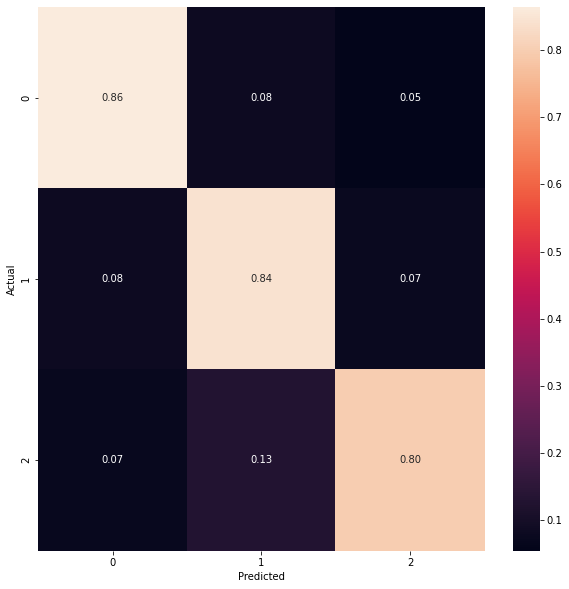

In [ ]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)